In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 


In [3]:
df = pd.read_csv('creditcardR.csv')
# print(df.to_string())


In [4]:
#Basic Info
print(df.shape)
print(df.head())


(100000, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

In [5]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    100000 non-null  float64
 1   V1      100000 non-null  float64
 2   V2      100000 non-null  float64
 3   V3      100000 non-null  float64
 4   V4      100000 non-null  float64
 5   V5      100000 non-null  float64
 6   V6      100000 non-null  float64
 7   V7      100000 non-null  float64
 8   V8      100000 non-null  float64
 9   V9      100000 non-null  float64
 10  V10     100000 non-null  float64
 11  V11     100000 non-null  float64
 12  V12     100000 non-null  float64
 13  V13     100000 non-null  float64
 14  V14     100000 non-null  float64
 15  V15     100000 non-null  float64
 16  V16     100000 non-null  float64
 17  V17     100000 non-null  float64
 18  V18     100000 non-null  float64
 19  V19     100000 non-null  float64
 20  V20     100000 non-null  float64
 21  V21     100

In [7]:
print(df['Class'].value_counts())


Class
0    99777
1      223
Name: count, dtype: int64


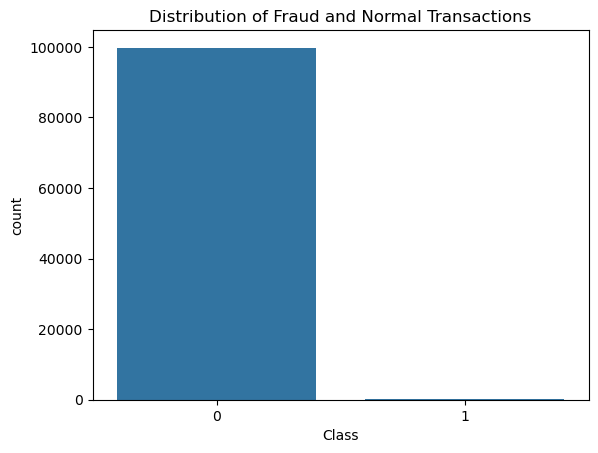

In [8]:
#Plot Class Distribution
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraud and Normal Transactions')
plt.show()


In [9]:
#Create fraud and normal DataFrames for EDA
fraud = df[df['Class']==1]
normal = df[df['Class']==0]
print(fraud.shape, normal.shape)

(223, 31) (99777, 31)


In [10]:
fraud.Amount.describe()


count     223.000000
mean      116.170852
std       256.033191
min         0.000000
25%         1.000000
50%         8.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [11]:
normal.Amount.describe()

count    99777.000000
mean        97.920523
std        264.641755
min          0.000000
25%          7.580000
50%         26.360000
75%         89.000000
max      19656.530000
Name: Amount, dtype: float64

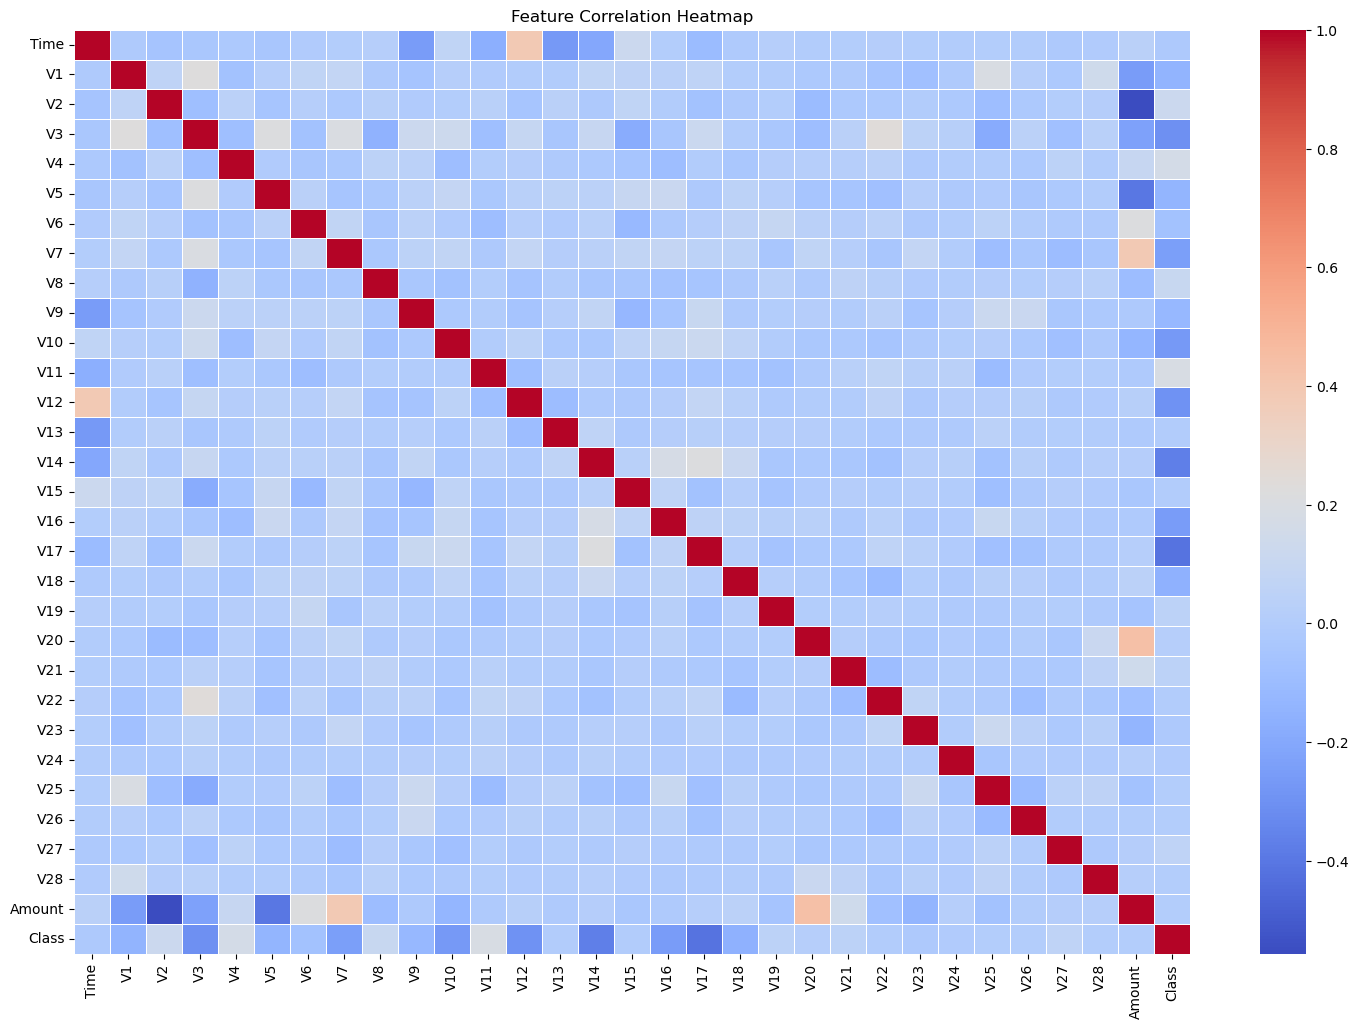

In [ ]:
#corelation by hitmap
corr_matrix = df.corr()

# Set up the plot
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()

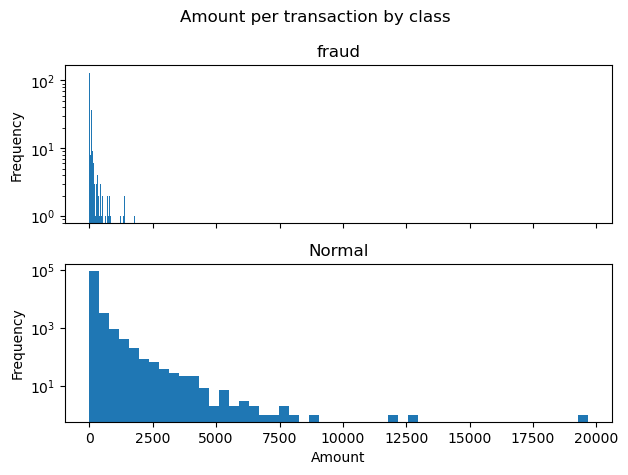

In [12]:
#Histogram of Amount for Fraud and Normal
f,(ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle('Amount per transaction by class')
ax1.hist(fraud.Amount, bins= 50)
ax1.set_title('fraud')
ax2.hist(normal.Amount, bins=50)
ax2.set_title('Normal')

ax2.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Frequency')
ax1.set_yscale('log')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

In [14]:
# Number of fraud cases
n_fraud = len(fraud)

# Random sample of normal transactions
normal_sample = normal.sample(n=n_fraud * 5, random_state=42)  # 5:1 ratio

# Combine and shuffle
df_balanced = pd.concat([fraud, normal_sample]).sample(frac=1, random_state=1)


In [15]:
#Feature Engineering
from sklearn.preprocessing import StandardScaler

# Copy the data
df_model = df_balanced.copy()

# Standardize 'Amount' and 'Time'
scaler = StandardScaler()
df_model[['Amount', 'Time']] = scaler.fit_transform(df_model[['Amount', 'Time']])


In [16]:
# Features and target
X = df_model.drop('Class', axis=1)
y = df_model['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [17]:

#Train Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
tree = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier( eval_metric='logloss', random_state=42)

# Train
log_reg.fit(X_train, y_train)
tree.fit(X_train, y_train)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

import xgboost
print(xgboost.__version__)


In [18]:
# Evaluate Models
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": tree,
    "XGBoost": xgb
}

for name, model in models.items():
    print(f"=== {name} ===")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))
    print()


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       223
           1       0.98      0.93      0.95        45

    accuracy                           0.99       268
   macro avg       0.98      0.96      0.97       268
weighted avg       0.99      0.99      0.98       268

AUC-ROC Score: 0.964424514200299

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       223
           1       0.84      0.93      0.88        45

    accuracy                           0.96       268
   macro avg       0.91      0.95      0.93       268
weighted avg       0.96      0.96      0.96       268

AUC-ROC Score: 0.9487294469357249

=== XGBoost ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       223
           1       1.00      0.96      0.98        45

    accuracy                           0.99    

In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='f1', cv=3)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

Best parameters: {'max_depth': 3, 'min_samples_split': 2}
Best F1 Score: 0.895479550346807


In [19]:
#Hyperparameter Tuning for XGBoost using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100]
}

xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)

# Grid search
grid = GridSearchCV(estimator=xgb_clf,
                    param_grid=param_grid,
                    scoring='f1',
                    cv=3,
                    verbose=1,
                    n_jobs=-1)

grid.fit(X_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100]},
             scoring='f1', verbose=1)

In [20]:
#Evaluate the Best Model
print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       223
           1       1.00      0.96      0.98        45

    accuracy                           0.99       268
   macro avg       1.00      0.98      0.99       268
weighted avg       0.99      0.99      0.99       268

AUC-ROC Score: 0.9777777777777779


In [ ]:
#Build a Clean Pipeline (Preprocessing + Model)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Only scale these 2 columns
scale_features = ['Amount', 'Time']
preprocessor = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), scale_features)],
    remainder='passthrough' 
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', XGBClassifier(**grid.best_params_, eval_metric='logloss'))
])

pipeline.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Amount', 'Time'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='l...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
#Save Pipeline Output for Testing 

y_pred_pipeline = pipeline.predict(X_test)
print(classification_report(y_test, y_pred_pipeline))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       223
           1       1.00      0.96      0.98        45

    accuracy                           0.99       268
   macro avg       1.00      0.98      0.99       268
weighted avg       0.99      0.99      0.99       268



In [26]:

import joblib

joblib.dump(pipeline, 'fraud_model.pkl')


['fraud_model.pkl']

In [31]:
import streamlit as st
import joblib
import numpy as np

model = joblib.load('fraud_model.pkl')

st.title("Real-Time Fraud Detection")

amount = st.number_input("Transaction Amount")
time = st.number_input("Time (in seconds since first transaction)")

if st.button("Predict"):
    input_data = np.array([[amount, time] + [0]*28])  # dummy V1-V28
    prediction = model.predict(input_data)
    result = "Fraud" if prediction[0] == 1 else "Not Fraud"
    st.write(f"Prediction: {result}")
